<a href="https://colab.research.google.com/github/subha9542/AI_project/blob/master/tfs436_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question 1: Coronavirus Spread



Selected Texas Cities Map

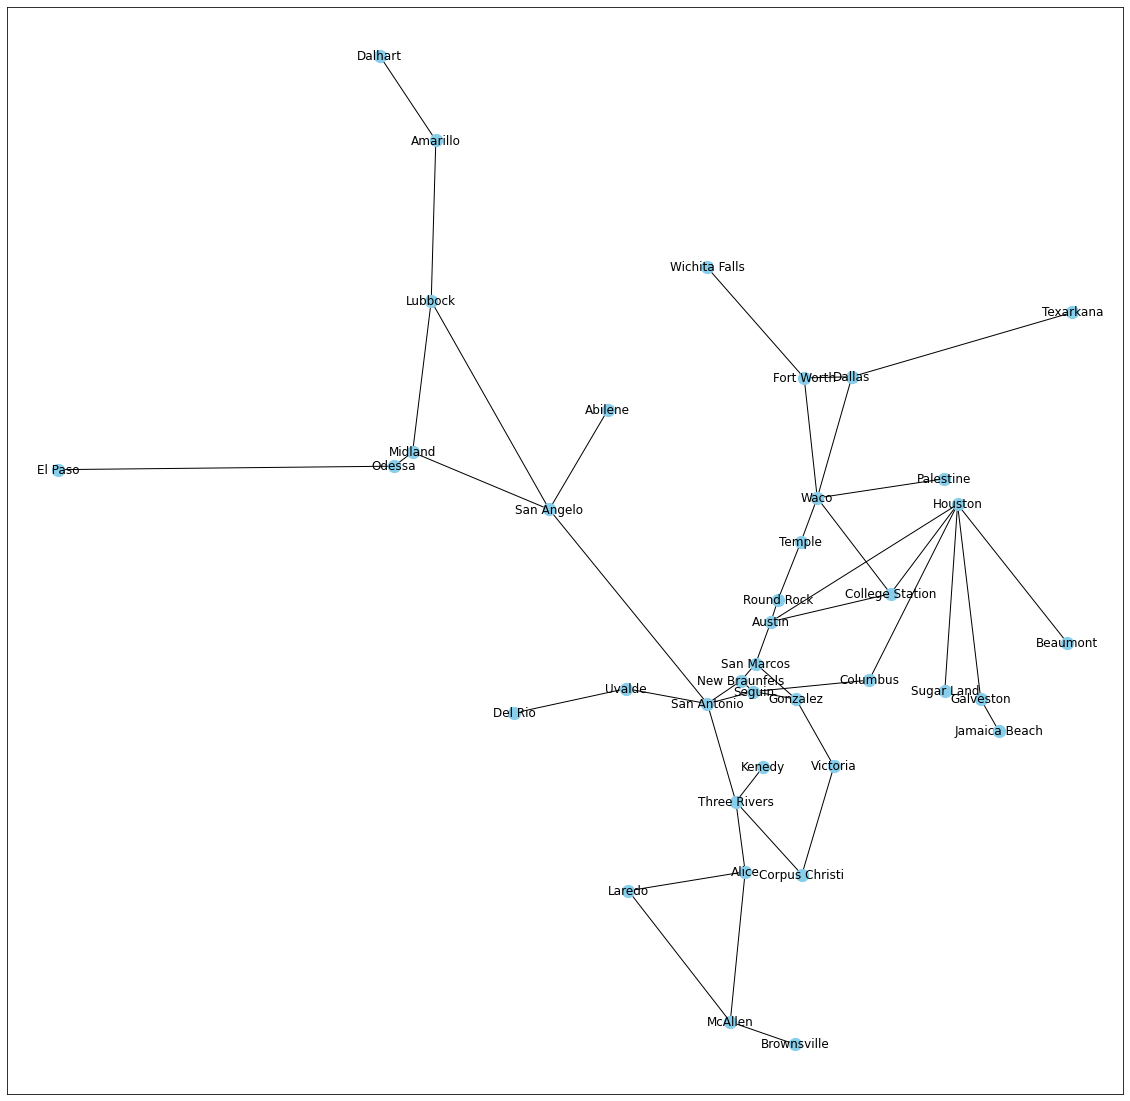

In [1]:
#!pip3 install networkx==2.3
import itertools
from PIL import Image 
import copy
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import transforms
import requests
import io
from collections import deque
import matplotlib as mpl
import plotly.graph_objects as go
import urllib

edges_url="https://raw.githubusercontent.com/subha9542/AI_project/master/mappings.csv"
edges_req=requests.get(edges_url).content
edgelist = pd.read_csv(io.StringIO(edges_req.decode('utf-8')),header=None)

nodes_url="https://raw.githubusercontent.com/subha9542/AI_project/master/nodes.csv"
nodes_req=requests.get(nodes_url).content
nodelist = pd.read_csv(io.StringIO(nodes_req.decode('utf-8')),header=None)

G = nx.Graph()
for i, nlrow in nodelist.iterrows():
    G.add_node(nlrow[0],pos=(nlrow[2],nlrow[1]))
for i, elrow in edgelist.iterrows():
    G.add_edge(elrow[0], elrow[1], weight=elrow[2] )

pos = nx.get_node_attributes(G,'pos')
#print(pos)
weight = nx.get_edge_attributes(G,'weight')
#print(weight)
new_weights = {}
for e, w in weight.items():
    new_weights[e] = round(w,2)
fig,ax = plt.subplots(figsize=(20, 20))
img_url="https://www.netclipart.com/pp/m/124-1241893_photos-of-texas-map-clip-art-texas-state.png"
img_req=urllib.request.urlopen(img_url)
imData = plt.imread(img_url,'png')
#ax.imshow(imData,extent = [20,0,20,0])
#imData = Image.open(img_req)
nx.draw_networkx(G,pos,with_labels=True,edge_labels = weight, node_color='skyblue', node_size=150,edge_color='black',ax =ax,zorder = 0)

#nx.draw_networkx_edge_labels(G,pos,with_labels=True,edge_labels = new_weights, node_color='skyblue', node_size=150,edge_color='black',ax =ax,zorder = 2)
#plt.show()
#nx.draw(g)
#plt.show()
#nx.spring_layout(g,pos = pos,iterations = 1,scale = 100,center = [0,0])
#https://www.datacamp.com/community/tutorials/networkx-python-graph-tutorial

Search 1: Coronavirus spread

In [2]:
def get_nearest_neighbour(child):
    neighs = [i for i in G.neighbors(child)]
    if i is None:
      return None
    else:
      dict = {ne:G[child][ne]['weight'] for ne in neighs}
      sorted_dict = sorted(dict.items(), key=lambda kv: kv[1])
      cities = [i for i,k in sorted_dict]
    return iter(cities)
def uniform_cost_traversal(G, source,destination, neighbors=None):
    visited = {source}
    depth_limit = len(G)
    queue = deque([(source, depth_limit, get_nearest_neighbour(source))])
    while queue:
        parent, depth_now, Children = queue[0]
        try:
            child = next(Children)
            if child not in visited:
                yield parent, child
                visited.add(child)
                if child == destination:
                    break
                if depth_now > 1:
                    queue.append((child, depth_now - 1, get_nearest_neighbour(child)))
        except StopIteration:
            queue.popleft()
def uniform_cost(G, source, destination = None):
    T = nx.Graph()
    T.add_node(source)
    edges_gen = [e for e in uniform_cost_traversal(G, source,destination, G.neighbors)]
    T.add_edges_from(edges_gen)
    return T
print("The virus spreads in the following route:(using greedy bfs)\n")
count = 0
for i in list(uniform_cost(G,'Three Rivers')):
    print("-->",i,end = ' ')
    count+=1
    if count == 5:
      print("-->")
      print("\n")
      count = 0

The virus spreads in the following route:(using greedy bfs)

--> Three Rivers --> Kenedy --> Alice --> San Antonio --> Corpus Christi -->


--> Laredo --> McAllen --> New Braunfels --> Seguin --> Uvalde -->


--> San Angelo --> Victoria --> Brownsville --> San Marcos --> Gonzalez -->


--> Columbus --> Del Rio --> Abilene --> Midland --> Lubbock -->


--> Austin --> Houston --> Odessa --> Amarillo --> Round Rock -->


--> College Station --> Sugar Land --> Galveston --> Beaumont --> El Paso -->


--> Dalhart --> Temple --> Waco --> Jamaica Beach --> Dallas -->


--> Fort Worth --> Palestine --> Texarkana --> Wichita Falls 

Search 2: Vaccine distribution search

In [3]:
def find_shortest_path(graph, start, end, path=[]):
        path = path + [start]
        if start == end:
            return path
        shortest = None
        for node in graph[start]:
            if node not in path:
                newpath = find_shortest_path(graph, node, end, path)
                if newpath:
                    if not shortest or calculate_weights(newpath) < calculate_weights(shortest):
                        shortest = newpath
        return shortest
def calculate_weights(path):
    weight = 0
    for first, second in zip(path, path[1:]):
        weight+=G[first][second]['weight']
    return weight
#print(calculate_weights(['San Antonio','New Braunfels','San Marcos','Austin']))
print("Optimal paths are :\n")
for i in find_shortest_path(G, 'Galveston', 'Amarillo'):
    print("-->",i,end = ' ')
print("\n")
for i in find_shortest_path(G, 'Corpus Christi', 'Amarillo'):
    print("-->",i,end = ' ')

if(len(find_shortest_path(G, 'Galveston', 'Amarillo')) > len(find_shortest_path(G, 'Corpus Christi', 'Amarillo'))):
    print("\n\nBest path is from Corpus Christi")
else:
    print("\n\nBest path is from Galveston")

Optimal paths are :

--> Galveston --> Houston --> Columbus --> Seguin --> San Antonio --> San Angelo --> Lubbock --> Amarillo 

--> Corpus Christi --> Three Rivers --> San Antonio --> San Angelo --> Lubbock --> Amarillo 

Best path is from Corpus Christi


#Question 2: Analysis



> 1.Uniform cost search algorithm is optimal for spreading.
*   Implemented Uniform cost search algorithm
*   It is uninformed search
*   No heuristic function in this algorithm
*   Reason why I choose this is no goal state, the virus will spread to nearby cities first which means explore low weight edges first.


> 2.UCS is guided by path cost rather than path length so it is hard to determine its complexity in terms of b and d, so if we consider C to be the cost of the optimal solution, and every action costs at least e, then the algorithm worst case is O($b^{C/e}$).


> 3.Dijkstra's Shortest Path First algorithm is optimal for vaccine distribution.
*   Implemented Dijkstra's Shortest Path First algorithm
*   It is uninformed search
*   No heuristic function in this algorithm
*   Reason why I choose this is the vaccine should find shortest path to destination.


> 4.Time Complexity of Dijkstra's Algorithm is O ( $V^2$ ) but with min-priority queue it drops down to O ( $V + E l o g V$ ). here V is number of vertices and E is number of edges.























# Question 3: Bonus Question
